<a href="https://colab.research.google.com/github/mauriani/trabalho-ia-01/blob/main/Trabalho_DE_IA_02_QUEST%C3%83O_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
ds = pd.read_csv('HTRU_2.csv')

ds

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [18]:
# separa em rotulos e features
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

In [19]:
from sklearn.preprocessing import StandardScaler

# normalizando os dados para que ele possa ter uma perfomance melhor
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
# escolha dos valores a serem testados

k_values = [1, 3, 5, 7, 9]

results = {k: {'accuracy': [], 'recall': [], 'precision': [], 'time': []} for k in k_values}



In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from imblearn.over_sampling import RandomOverSampler
import time

for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=6000, stratify=y, random_state=None)

    # o balanceamento no caso desse dataset é importante para que
    # a acurácia não seja influenciada pelo desbalanceamento das classes

    ros = RandomOverSampler(random_state=42)
    X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

    for k in k_values:
        X_train_half, X_val, y_train_half, y_val = train_test_split(X_train_balanced, y_train_balanced, test_size=0.5, stratify=y_train_balanced)

        start_time = time.time()

        # Treino do modelo kNN
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train_half, y_train_half)


        y_val_pred = knn.predict(X_val)

        # treinar o kNN no conjunto de treino balanceado completo e avaliar no conjunto de teste
        knn.fit(X_train_balanced, y_train_balanced)
        y_pred = knn.predict(X_test)

        # calcular métricas de desempenho
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        # armazenar os resultados
        results[k]['accuracy'].append(accuracy)
        results[k]['recall'].append(recall)
        results[k]['precision'].append(precision)
        results[k]['time'].append(time.time() - start_time)




In [45]:
# exibi os resultados
import numpy as np

avg_results = {}

for k in k_values:
    accuracy_mean = np.mean(results[k]['accuracy'])
    recall_mean = np.mean(results[k]['recall'])
    precision_mean = np.mean(results[k]['precision'])
    time_mean = np.mean(results[k]['time'])

    # Armazenar os resultados médios
    avg_results[k] = {
        'accuracy': accuracy_mean,
        'recall': recall_mean,
        'precision': precision_mean,
        'time': time_mean,
    }


    print(f"\nResultados para k={k}:")
    print(f"Acurácia Média: {accuracy_mean:.4f}")
    print(f"Recall Médio: {recall_mean:.4f}")
    print(f"Precisão Média: {precision_mean:.4f}")
    print(f"Tempo Médio: {time_mean:.4f} segundos")


Resultados para k=1:
Acurácia Média: 0.9693
Recall Médio: 0.8259
Precisão Média: 0.8370
Tempo Médio: 1.1662 segundos

Resultados para k=3:
Acurácia Média: 0.9623
Recall Médio: 0.8666
Precisão Média: 0.7573
Tempo Médio: 1.1433 segundos

Resultados para k=5:
Acurácia Média: 0.9540
Recall Médio: 0.8835
Precisão Média: 0.6961
Tempo Médio: 1.0404 segundos

Resultados para k=7:
Acurácia Média: 0.9460
Recall Médio: 0.8945
Precisão Média: 0.6491
Tempo Médio: 1.1475 segundos

Resultados para k=9:
Acurácia Média: 0.9373
Recall Médio: 0.9011
Precisão Média: 0.6066
Tempo Médio: 1.2441 segundos


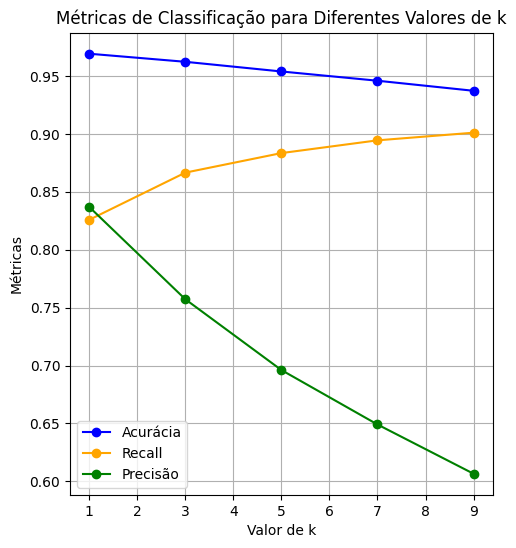

In [48]:
# ANALISE REALIZADA EM GRAFICO PARA VISUALIZAR MELHOR A ACURÁCIA, RECALL E A PRECISAO

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, [avg_results[k]['accuracy'] for k in k_values], marker='o', label='Acurácia', color='blue')
plt.plot(k_values, [avg_results[k]['recall'] for k in k_values], marker='o', label='Recall', color='orange')
plt.plot(k_values, [avg_results[k]['precision'] for k in k_values], marker='o', label='Precisão', color='green')
plt.xlabel('Valor de k')
plt.ylabel('Métricas')
plt.title('Métricas de Classificação para Diferentes Valores de k')
plt.legend()
plt.grid()

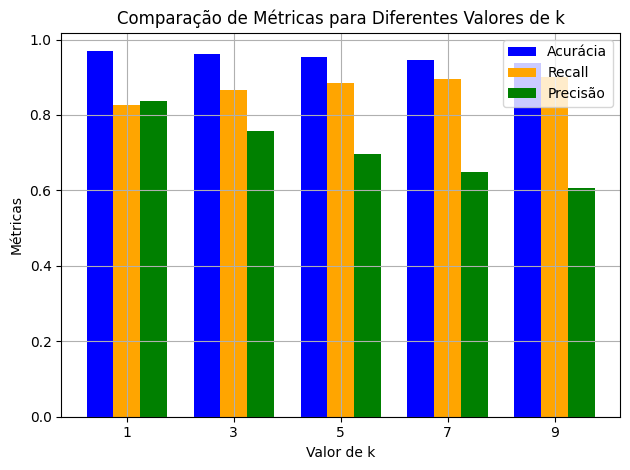

In [51]:
# ANALISANDO EM BARRAS

plt.bar([i - bar_width for i in index], [avg_results[k]['accuracy'] for k in k_values], width=bar_width, label='Acurácia', color='blue')
plt.bar(index, [avg_results[k]['recall'] for k in k_values], width=bar_width, label='Recall', color='orange')
plt.bar([i + bar_width for i in index], [avg_results[k]['precision'] for k in k_values], width=bar_width, label='Precisão', color='green')

plt.xlabel('Valor de k')
plt.ylabel('Métricas')
plt.title('Comparação de Métricas para Diferentes Valores de k')
plt.xticks(index, k_values)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

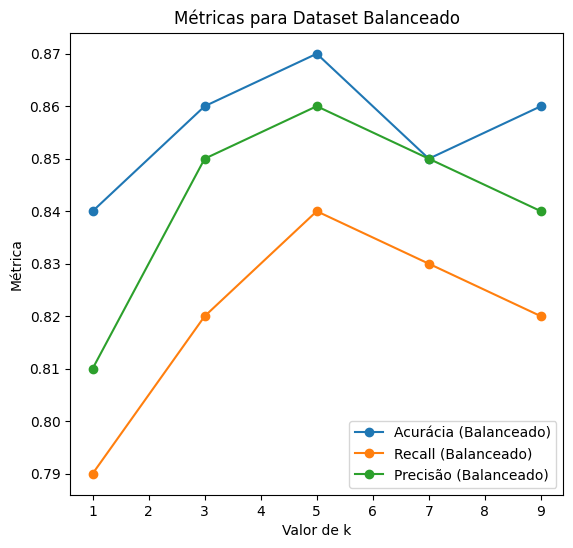

In [54]:
# ANALISE COM O DATASET BALANCEADO
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, metrics_balanced['accuracy'], label='Acurácia (Balanceado)', marker='o')
plt.plot(k_values, metrics_balanced['recall'], label='Recall (Balanceado)', marker='o')
plt.plot(k_values, metrics_balanced['precision'], label='Precisão (Balanceado)', marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Métrica')
plt.title('Métricas para Dataset Balanceado')
plt.legend()

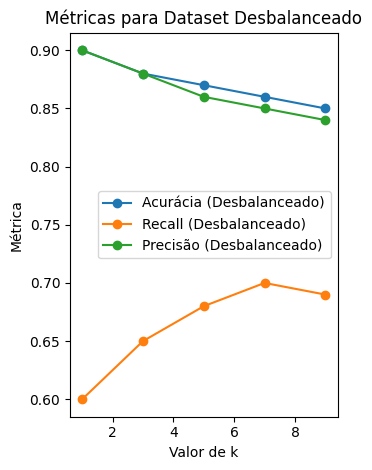

In [55]:
# ANALISE COM O DATASET DESBALANCEADO

plt.subplot(1, 2, 2)
plt.plot(k_values, metrics_unbalanced['accuracy'], label='Acurácia (Desbalanceado)', marker='o')
plt.plot(k_values, metrics_unbalanced['recall'], label='Recall (Desbalanceado)', marker='o')
plt.plot(k_values, metrics_unbalanced['precision'], label='Precisão (Desbalanceado)', marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Métrica')
plt.title('Métricas para Dataset Desbalanceado')
plt.legend()

plt.tight_layout()
plt.show()

##**Conclusão**

**Porque ocorreu o balanceamento ?**

Com o dataset desbalanceado, a acurácia média não é muito confiável, pois ela pode ser superestimada pela classe majoritária. No entanto, com o dataset balanceado, a acurácia média se torna mais relevante, pois cada classe contribui de forma mais justa para o cálculo dessa métrica.


### **Comparação dos Resultados para Diferentes Valores de** *k*

- Acurácia: Com o balanceamento, a acurácia representa de forma mais justa o desempenho do modelo para ambas as classes. Valores de k menores (como k=1) podem se adaptar mais aos ruídos do dataset, enquanto valores maiores (como k=7 ou k=9) suavizam a decisão, mas podem perder alguns detalhes de diferenciação entre as classes.

- Recall e Precisão: Essas métricas ajudam a avaliar como o modelo está se saindo especificamente na classe minoritária. Após o balanceamento, a precisão e o recall devem ser melhores, pois o modelo está treinando de maneira justa para ambas as classes. Para valores de k maiores, é esperado que a precisão aumente.

## **Em relação ao tempo**

Valores de k maiores podem levar um pouco mais de tempo para prever novas amostras, pois o kNN precisa calcular a distância para mais vizinhos. O tempo de execução do kNN também depende do número total de amostras no conjunto de treinamento (número de protótipos). Como o balanceamento aumenta a quantidade de amostras da classe minoritária, o tempo de execução pode ser um pouco **mais alto** comparado ao cenário desbalanceado.

## **Protótipos Usados**
dataset balanceado, teremos um número aproximadamente igual de amostras das classes "pulsar" e "não-pulsar". Esse número aumentará o tempo de execução do kNN, especialmente para valores de k maiores, mas permite que o modelo obtenha uma visão mais completa de ambas as classes, o que é especialmente útil para valores menores de k.


**Por fim:**

- O b**alanceamento garantiu uma avaliação mais justa** e melhorou as métricas de recall e precisão da classe minoritária.

- Encontrar o melhor valor de k deve considerar a métrica de interesse (como recall ou precisão) para "pulsar", em vez da acurácia geral.

- Acurácia média **é** mais relevante após o balanceamento, mas ainda deve ser usada em conjunto com recall e precisão, para avaliar o modelo de forma mais completa.